## This notebook is just an improved version of another one in the same repo, by improved I mean that the Hamiltonian icludes all possible combinations of Pauli terms,  I did it maily because I wanted to explore how the ansatz would work for other hamiltonians, and if a bigger number of expected values would impact the accuracy of the estimation, I also made a little function that generates a random Hermitian matrix, to use as Hamiltonian

In [11]:
import sympy as sp
import numpy as np
from qiskit import *

# This is the function to generate a random hermitian matrix written in terms of pauli matrices

In [46]:
def rando_hermitian():
    sigmax=np.array([[0,1],[1,0]])
    sigmay=np.array([[0,-1j],[1j,0]])
    sigmaz=np.array([[1,0],[0,-1]])
    Identity=np.array([[1,0],[0,1]])
    II=np.kron(Identity,Identity)
    IZ=np.kron(Identity,sigmaz)
    IX=np.kron(Identity,sigmax)
    IY=np.kron(Identity,sigmay)
    ZI=np.kron(sigmaz,Identity)
    ZZ=np.kron(sigmaz,sigmaz)
    ZX=np.kron(sigmaz,sigmax)
    ZY=np.kron(sigmaz,sigmay)
    XI=np.kron(sigmax,Identity)
    XZ=np.kron(sigmax,sigmaz)
    XX=np.kron(sigmax,sigmax)
    XY=np.kron(sigmax,sigmay)
    YI=np.kron(sigmay,Identity)
    YZ=np.kron(sigmay,sigmaz)
    YX=np.kron(sigmay,sigmax)
    YY=np.kron(sigmay,sigmay)
    pauli=[II,IZ,IX,IY,ZI,ZZ,ZX,ZY,XI,XZ,XX,XY,YI,YZ,YX,YY]
    tags=['II','IZ','IX','IY','ZI','ZZ','ZX','ZY','XI','XZ','XX','XY','YI','YZ','YX','YY']
    elements=np.random.rand(16,1)
    general_m=np.zeros((4,4),dtype='complex128')

    for i in range(0,len(tags)):
        general_m+=pauli[i]*elements[i]
    coeff={}
    for i in range(len(tags)):
        coeff[tags[i]]=elements[i][0]
    return general_m,coeff


# Let us check that the matrix is hermitian and see the dictionary for each of the coefficients

In [47]:
Matriz,coeff=rando_hermitian()

In [49]:
Matriz==np.conjugate(Matriz.T)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [50]:
coeff

{'II': 0.5113290221874113,
 'IZ': 0.7478101253552315,
 'IX': 0.3371509280337114,
 'IY': 0.764615689013728,
 'ZI': 0.7830689764014499,
 'ZZ': 0.4082294638327574,
 'ZX': 0.19085456709997328,
 'ZY': 0.6332706161301479,
 'XI': 0.8147172621653395,
 'XZ': 0.8559611692243015,
 'XX': 0.06581395897140052,
 'XY': 0.8462565374925356,
 'YI': 0.3120437804680367,
 'YZ': 0.22391812951263057,
 'YX': 0.7439863902638134,
 'YY': 0.6755959891275074}

# Now let us just use the functions from the previous notebook

In [51]:
def ansatz(circuit, theta):
    q = circuit.qregs[0]
    circuit.h(q[0])
    circuit.cx(q[0], q[1])
    circuit.rx(theta, q[0])
    return circuit

In [52]:
def two_qubit_vqe(theta, basis):
    q = QuantumRegister(2)
    c = ClassicalRegister(2)
    circuit = QuantumCircuit(q, c)

    # implement the ansate in the circuit
    circuit = ansatz(circuit, theta)
    # measurement
    if basis == 'ZZ':
        circuit.measure(q, c)
    elif basis == 'XX':
        circuit.u2(0, np.pi, q[0])
        circuit.u2(0, np.pi, q[1])
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'YY':
        circuit.u2(0, np.pi/2, q[0])
        circuit.u2(0, np.pi/2, q[1])
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'IX':
        circuit.u2(0, np.pi, q[1])
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'IY':
        circuit.u2(0, np.pi/2, q[1])
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'IZ':
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'ZI':
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'ZX':
        circuit.u2(0, np.pi, q[1])
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'ZY':
        circuit.u2(0, np.pi/2, q[1])
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'XI':
        circuit.u2(0, np.pi, q[0])
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'XZ':
        circuit.u2(0, np.pi, q[0])
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'XX':
        circuit.u2(0, np.pi, q[0])
        circuit.u2(0, np.pi, q[1])
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'XY':
        circuit.u2(0, np.pi, q[0])
        circuit.u2(0, np.pi/2, q[1])
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'YZ':
        circuit.u2(0, np.pi/2, q[0])
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'YI':
        circuit.u2(0, np.pi/2, q[0])
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    elif basis == 'YX':
        circuit.u2(0, np.pi/2, q[0])
        circuit.u2(0, np.pi, q[1])
        circuit.measure(q[0], c[0])
        circuit.measure(q[1], c[1])
    else:
        raise ValueError('Not a valid pauli basis, input should be X,Y or Z, we excluded I because no circuit is needed')

    return circuit


In [53]:
def get_expectation(theta, basis):
    
    if basis == 'II':
        return 1
    else:
        circuit = two_qubit_vqe(theta, basis)
    
    shots = 10000 # Max
    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(circuit, backend, shots=shots)
    result = job.result()
    counts = result.get_counts()
    
    expected_value = 0
    for event in counts:
        pm = 1
        if event == '01':
            pm = -1
        if event == '10':
            pm = -1
        expected_value += pm * counts[event] / shots
        
    return expected_value

In [54]:
def vqe_ground(theta):
    sum_=0
    tags=['II','IZ','IX','IY','ZI','ZZ','ZX','ZY','XI','XZ','XX','XY','YI','YZ','YX','YY']
    for i in tags:
         sum_+=coeff[i]*get_expectation(theta, i)

    
    # summing the measurement results    
    return sum_

In [55]:
vqe_ground(np.pi)

-0.6782835107814857

In [56]:
xxxx=np.arange(-np.pi,np.pi,np.pi/64)
vqeeee = [ vqe_ground(i) for i in xxxx]


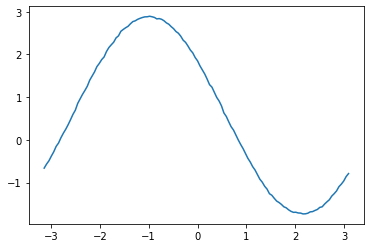

In [57]:
import matplotlib.pyplot as plt
plt.plot(xxxx,vqeeee)
plt.show()

# We can see that the estimation is not as good as with the simple matrix given in the task, next let us try running on one of IBM devices, and using different ansatzes

In [58]:
min(vqeeee)

-1.7343076547230905

In [60]:
np.linalg.eigvals(Matriz)

array([ 4.47751163+2.28384048e-18j, -1.91973273-1.81292304e-17j,
        0.04197688+6.45553712e-18j, -0.55443969+9.26565796e-17j])